Training Accuracy: 0.99, Validation Accuracy: 0.99, Test Accuracy: 0.99

Training Confusion Matrix:
[[275   0   5]
 [  0 270   4]
 [  1   1 284]]

Test Confusion Matrix:
[[47  0  0]
 [ 0 40  1]
 [ 0  0 32]]


C:\Users\biswa\AppData\Local\Temp\ipykernel_9240\1914603179.py:47: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\biswa\AppData\Local\Temp\ipykernel_9240\1914603179.py:47: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


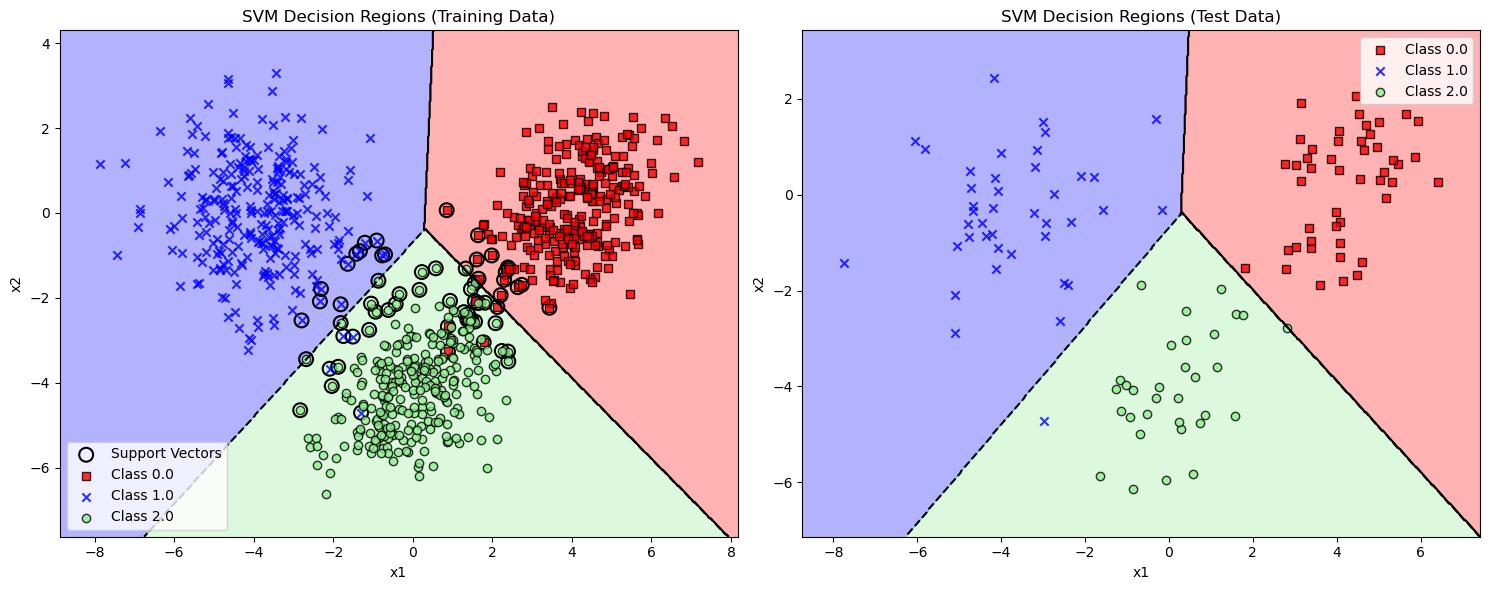


Accuracy Table:
      Dataset  Accuracy
0    Training  0.986905
1  Validation  0.987500
2        Test  0.991667


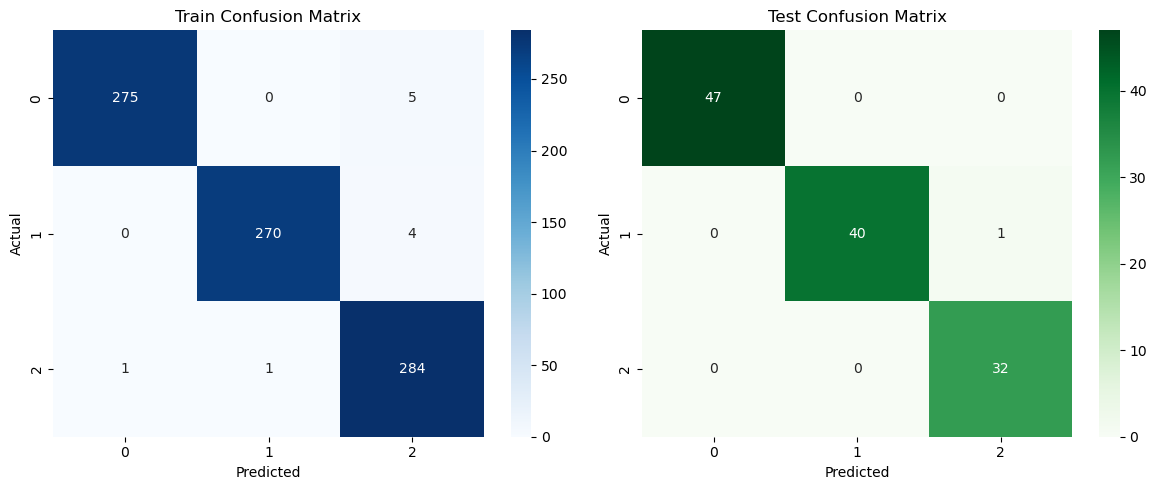

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

# Load the datasets
train_data = pd.read_csv('Dataset-1/train.csv')
test_data = pd.read_csv('Dataset-1/test.csv')
val_data = pd.read_csv('Dataset-1/val.csv')

# Split into inputs (X) and labels (y)
X_train = train_data[['x1', 'x2']].values
y_train = train_data['label'].values
X_test = test_data[['x1', 'x2']].values
y_test = test_data['label'].values
X_val = val_data[['x1', 'x2']].values
y_val = val_data['label'].values

# Helper function to plot decision regions with margin lines
def plot_decision_regions(X, y, classifier, title, ax, show_support_vectors=True, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)

    # Plot margin lines
    ax.contour(xx1, xx2, Z, levels=[-1, 0, 1], colors='black', linestyles=['--', '-', '--'], linewidths=1.5)

    # Optionally plot support vectors for training data
    if show_support_vectors:
        sv = classifier.support_vectors_
        ax.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolor='k', linewidths=1.5, label='Support Vectors')

    # Plot data points
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=colors[idx],
                   marker=markers[idx], label=f'Class {cl}', edgecolor='black')

    ax.set_title(title)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.legend()

# SVM Classifier with adjusted regularization parameter C for fewer support vectors
svm_clf = SVC(kernel='linear', C=0.1)

# Training and evaluation function
def evaluate_classifier(X_train, y_train, X_val, y_val, X_test, y_test, classifier, ax):
    classifier.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = classifier.predict(X_train)
    y_val_pred = classifier.predict(X_val)
    y_test_pred = classifier.predict(X_test)
    
    # Accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Print classification accuracies
    print(f'Training Accuracy: {train_accuracy:.2f}, Validation Accuracy: {val_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}')
    
    # Confusion matrices
    train_cm = confusion_matrix(y_train, y_train_pred)
    test_cm = confusion_matrix(y_test, y_test_pred)
    
    print('\nTraining Confusion Matrix:')
    print(train_cm)
    
    print('\nTest Confusion Matrix:')
    print(test_cm)
    
    # Plot decision regions for training data with support vectors
    plot_decision_regions(X_train, y_train, classifier, 'SVM Decision Regions (Training Data)', ax[0], show_support_vectors=True)
    
    # Plot decision regions for test data without support vectors
    plot_decision_regions(X_test, y_test, classifier, 'SVM Decision Regions (Test Data)', ax[1], show_support_vectors=False)
    
    return train_accuracy, val_accuracy, test_accuracy, train_cm, test_cm

# Plot initialization
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Evaluate the classifier
train_accuracy, val_accuracy, test_accuracy, train_cm, test_cm = evaluate_classifier(
    X_train, y_train, X_val, y_val, X_test, y_test, svm_clf, axs)

plt.tight_layout()
plt.show()

# Accuracy Table
accuracy_df = pd.DataFrame({
    'Dataset': ['Training', 'Validation', 'Test'],
    'Accuracy': [train_accuracy, val_accuracy, test_accuracy]
})
print("\nAccuracy Table:")
print(accuracy_df)

# Plot confusion matrices using heatmaps
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title('Train Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(test_cm, annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title('Test Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()
